In [43]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
import os 
import shutil
from tqdm import tqdm

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

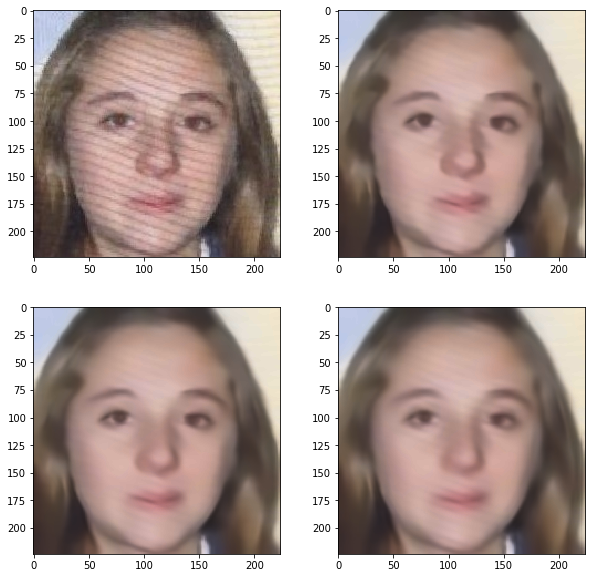

In [18]:
# Reading image from folder where it is stored 
img = cv2.imread('../data/aligned_i12s1819/002432A.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# denoising of image saving it into dst image 
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15) 
dst1 = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 10, 15) # Este
dst2 = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 20, 15) 
  
# Plotting of source and destination image 
plt.subplot(221), plt.imshow(img) 
plt.subplot(222), plt.imshow(dst) 
plt.subplot(223), plt.imshow(dst1) 
plt.subplot(224), plt.imshow(dst2) 
  
plt.show() 

In [40]:
input_path = '../data/aligned_i12s1819/'
output_path = '../data/aligned_i12s1819denoising/'

imgs = os.listdir(input_path)

In [41]:
imgs.remove('.DS_Store')

In [44]:
for img in tqdm(imgs):
    name = img.split('.')[0][-1]
    if name == 'B':
        shutil.copy(input_path + '/' + img, output_path + '/' + img)
    elif name == 'A':
        img_to_denois = cv2.imread(input_path + '/' + img) 
        #img_to_denois = cv2.cvtColor(img_to_denois, cv2.COLOR_BGR2RGB)
        img_to_denois = cv2.fastNlMeansDenoisingColored(img_to_denois, None, 10, 10, 10, 15) 
        
        cv2.imwrite(output_path + '/' + img, img_to_denois)

100%|██████████| 4940/4940 [10:47<00:00,  7.63it/s]


In [35]:
img

'.DS_Store'